# Analysis survey

In [1]:
# Import modules
import os 

import json
import csv
import math
from textwrap import wrap
import itertools 
from itertools import combinations

# Classic analysis imports
import numpy as np 
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import plot_likert

# options for the notebook
pd.set_option('display.max_colwidth',1000)
plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 18})
import warnings
warnings.filterwarnings(action='once')

## Load data

In [2]:
df = pd.read_csv('./survey/data/ELIXIR BioHackathon 35 FAIRX (Responses) - Form responses 1.csv')

## Colnames

rename_col = {'1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Sex]': "Maintainer - Sex",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Gender]': "Maintainer - Gender",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Age]': "Maintainer - Age",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Ethnicity]': "Maintainer - Ethnicity",
              '1. If you develop or maintain databases: How often these resources include the following variables in their data model?   [Race]': "Maintainer - Race",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Sex]': "Researcher - Sex",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Gender]': "Researcher - Gender",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Age]': "Researcher - Age",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Ethnicity]': "Researcher - Ethnicity",
              '2. If you are a researcher: How often do you include the following variables in your datasets? [Race]': "Researcher - Race",
              '3. Does your interpretation of results include a intersectional analysis (sex, gender, age, ethnicity, race)? ': "Intersectional analysis",
              '4. Are you familiarised with guidelines for collection sex/gender/age/race/ethnicity or recommendations of best practices in biomedical research? (e.g. DOME: https://www.nature.com/articles/s41592-021-01205-4; SAGER: https://researchintegrityjournal.biomedcentral.com/articles/10.1186/s41073-016-0007-6#ref-CR15)': "Diversity knowledge",
              '5. Do you think capturing diversity (e.g., sex, gender, age, ethnicity) for biomedical research should be:': "Diversity capture",
              '6. How relevant do you consider the diversity (e.g., sex, gender, age, ethnicity) for biomedical research in your analysis?': "Diversity relevance",
              '7.  Would you be interested in receiving training on social and ethical implications of biomedical research? ': "Training in socio-ethics",
              '8. Have you experienced difficulties with datasets having many missing values of diversity data due to medical data providers withdrawing (parts of) informed consent?': "Missing diversity data",
              '9. How important is educating medical data providers to help raise awareness on the importance of diversity data? ': "Diversity awareness",
              '10. The European Commission has published a Gender equality plan to opt for research fundings. Also the Gendered Innovation published a report recommending how to introduce the sex and gender dimension in biomedical research.Requirements from journal editorial policies can have a powerful benefit as well, the adoption of a requirement to publish a crystal structure in the wwPDB or sequence to the NCBI helped drive such depositing practices to standard. How important is to include diversity information in publication and funding processes? ': "Diversity information",
              '11. Which mechanisms should be put in place to ensure that public and private biomedical research capture diversity dimension?': "Capturing diversity",
              '12. Are you a participant in the ELIXIR BioHackathon 2021?': "BioHackathon 2021 Participant",
              '13. Pronouns ': "Pronouns",
              '14. Age ': "Age",
              '15. Country: Place of Work': "Country",
              '16. Profession ': "Profession",
              '17. How do you use data in your work? ': "Use of data",
              '18. Work Experience ': "Work Experience",
              '"I accept the following privacy terms in compliance with the RGPD - General Data Protection Regulation (Regulation (EU) 2016/679 of the European Parliament of April 27, 2016 regarding the protection of natural persons with regard to treatment of personal data and the free circulation of these data and by which Directive 95/46 / CE is repealed): Your personal data are incorporated into files and treatments for which BIONFO4WOMEN PROGRAM - BARCELONA SUPERCOMPUTING CENTER is responsible, its purpose being the establishment and development of their relationship with the program, the accounting, fiscal and administrative management of the entity, allowing their participation in all kinds of activities and events that are held, sending communications by any means that they have provided us. The consent of the person interested in joining or participating in the activities of the entity is the cause of legitimacy for said treatments. These data will be kept indefinitely as long as you do not express your will to the contrary. Your data will not be transferred to any entity without your consent, except for the sessions provided by law. You can also, if your rights are not taken care of, present your claim to the Spanish Data Protection Agency. "': 'Consent'}

df = df.rename(columns=rename_col)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      66 non-null     object
 1   Maintainer - Sex               33 non-null     object
 2   Maintainer - Gender            32 non-null     object
 3   Maintainer - Age               33 non-null     object
 4   Maintainer - Ethnicity         31 non-null     object
 5   Maintainer - Race              29 non-null     object
 6   Researcher - Sex               40 non-null     object
 7   Researcher - Gender            38 non-null     object
 8   Researcher - Age               40 non-null     object
 9   Researcher - Ethnicity         37 non-null     object
 10  Researcher - Race              35 non-null     object
 11  Intersectional analysis        45 non-null     object
 12  Diversity knowledge            57 non-null     object
 13  Diversi

## Count of the participants to the survey

In [4]:
# Cleaning one other in Pronouns
df["Pronouns"] = df['Pronouns'].replace({"Do not subscribe to the belief system underlying this question": "Prefer not to say."})
pronouns_count = df['Pronouns'].value_counts().to_frame().reset_index().rename(columns={'index': 'Pronouns', 'Pronouns': "Count"})
pronouns_count

,Pronouns,Count
0,He/him,35
1,She/her,26
2,Prefer not to say.,5


### Age

In [5]:
age_count = df['Age'].value_counts().to_frame().reset_index().rename(columns={'index': 'Age', 'Age': "Count"})
sorter = ["18-24 years old.", "25-34 years old.", "35-44 years old.", "45-54 years old.", "55-64 years old."]
age_count["Age"] = age_count["Age"].astype("category")

age_count["Age"]= age_count["Age"].cat.set_categories(sorter)
age_count = age_count.sort_values("Age")
age_count

,Age,Count
4,18-24 years old.,5
0,25-34 years old.,23
1,35-44 years old.,22
2,45-54 years old.,11
3,55-64 years old.,5


### Years of Work Experience

In [6]:
work_xp_count = df['Work Experience'].value_counts().to_frame().reset_index().rename(columns={'index': 'Work Experience', 'Work Experience': "Count"})
sorter = ["< 1 year", "1 to 5 years", "6 to 10 years", "11 to 15 years", "More than 15 years"]
work_xp_count['Work Experience'] = work_xp_count['Work Experience'].astype("category")

work_xp_count['Work Experience']= work_xp_count['Work Experience'].cat.set_categories(sorter)
work_xp_count = work_xp_count.sort_values('Work Experience')
work_xp_count

,Work Experience,Count
4,< 1 year,5
0,1 to 5 years,22
2,6 to 10 years,10
3,11 to 15 years,9
1,More than 15 years,20


### Country

In [7]:
country_count = df['Country'].value_counts().to_frame().reset_index().rename(columns={'index': 'Country', 'Country': "Count"})
#sorter = ["< 1 year", "1 to 5 years", "6 to 10 years", "11 to 15 years", "More than 15 years"]
country_count['Country'] = country_count['Country'].astype("category")
country_count

,Country,Count
0,Spain,29
1,United Kingdom,8
2,France,8
3,Netherlands,5
4,Belgium,3
5,Germany,2
6,Greece,1
7,Switzerland,1
8,Italy,1
9,Estonia,1


### Biohackthon participants

In [8]:
bio_part_count = df['BioHackathon 2021 Participant'].value_counts().to_frame().reset_index().rename(columns={'index': 'BioHackathon 2021 Participant', 'BioHackathon 2021 Participant': "Count"})
bio_part_count

,BioHackathon 2021 Participant,Count
0,Yes,37
1,No,29


## All plotted 

In [9]:
all_info = {'Pronouns': pronouns_count, 
              'Age': age_count, 
              'Work Experience': work_xp_count, 
              'Country': country_count, 
               'BioHackathon 2021 Participant': bio_part_count}

/tmp/ipykernel_74775/1182824447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')
/tmp/ipykernel_74775/1182824447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')
/tmp/ipykernel_74775/1182824447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')
/tmp/ipykernel_74775/1182824447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')
/tmp/ipykernel_74775/1182824447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')


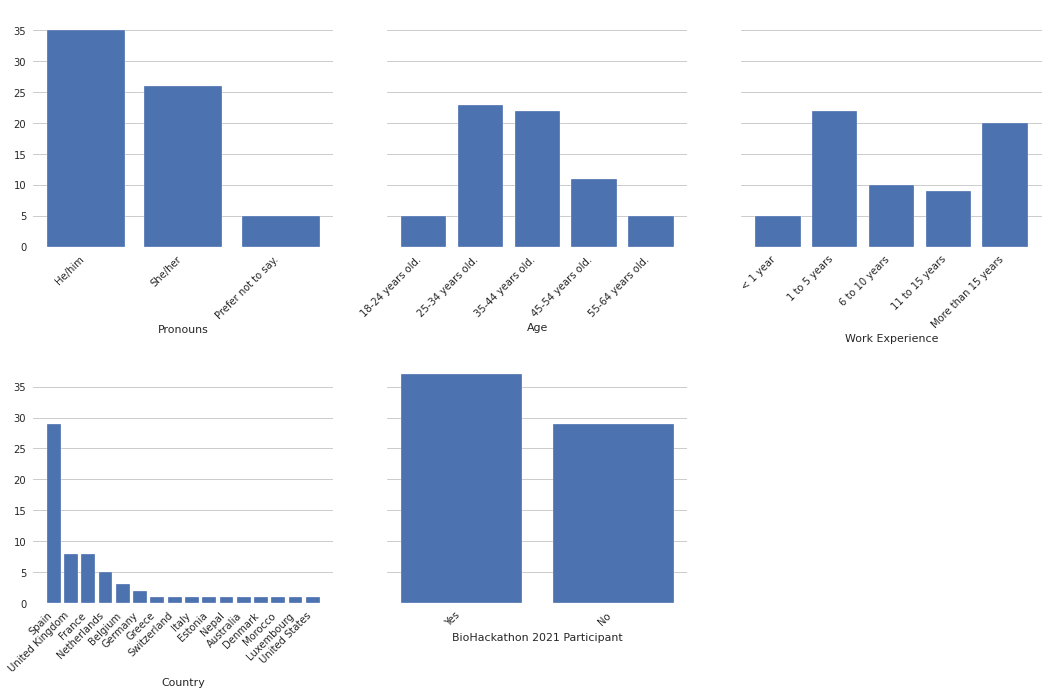

In [10]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(15, 10))
ax[1][2].set_visible(False) # To hide the last ax-plots as only 5 are shown
for indx, k in enumerate(all_info):
    if indx<=2:
        ax_y = indx
        ax_x = 0
    else:
        ax_y = indx-3
        ax_x = 1

    labels = all_info[k][k]
    ax[ax_x, ax_y].bar(all_info[k].iloc[:,0], all_info[k].iloc[:,1])

    ax[ax_x, ax_y].set_xlabel(k)
    ax[ax_x, ax_y].set_xticklabels(labels, rotation=45, ha='right')


for ax in fig.get_axes():
    #ax.yaxis.grid(False)   
    ax.xaxis.grid(False)  
    #ax.label_outer()
plt.tight_layout()


plt.show()

## Including intersectional analysis

In [11]:
intersectional_count = df['Intersectional analysis'].value_counts().to_frame().reset_index().rename(columns={'index': 'Intersectional analysis', 'Intersectional analysis': "Count"})
intersectional_count

,Intersectional analysis,Count
0,Yes,26
1,No,19


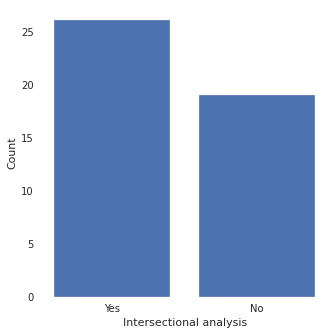

In [12]:
fig, ax = plt.subplots()
ax.bar(intersectional_count['Intersectional analysis'], intersectional_count['Count'])
ax.set_xlabel("Intersectional analysis")
ax.set_ylabel('Count') 
ax.yaxis.grid(False)   
ax.xaxis.grid(False)                                                 
plt.tight_layout()
plt.show()

## Diversity relevance


In [13]:
replace_value_div_rel = {'1': "Not relevant", '5': 'Extremely relevant'}

df['Diversity relevance'] = df['Diversity relevance'].astype(str)
df['Diversity relevance'] = df['Diversity relevance'].replace(replace_value_div_rel)
scale = ["Not relevant", '2', '3', '4', 'Extremely relevant']

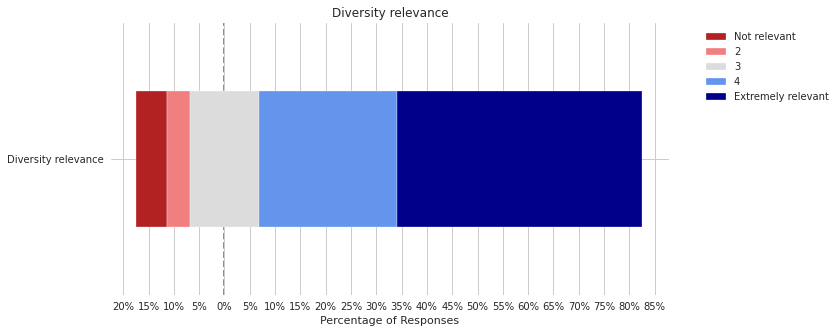

In [14]:
ax = plot_likert.plot_likert(df['Diversity relevance'].to_frame(), scale, 
                        plot_percentage=True, figsize=(10, 5))
ax.set_title("Diversity relevance")
plt.show()

## Information about data present in the different database as maintainer and Researchers

I transformed the likert scale (Never, ... Always) into numerical value from 0 to 4. 
The following radar plot takes the average of these values for both the maintainer and the researchers, to see if there are substantial difference in the different information available and/or between researchers and maintainers. 

In [15]:
## Rename likert scales for presentation

likert_renames = {'Never (1)': 'Never',
                  'Very Rarely (2)':  'Very Rarely',
                  'Occasionally (3)':  'Occasionally',
                  'Very Frequently (4)':  'Very Frequently',
                  'Always (5)': 'Always'}
df = df.replace(likert_renames)

### Radar plot: Plotting them on the same plot

In [16]:
# Transform into int to get the means for radar plots
likert_trans_int = {'Never': 0,
                  'Very Rarely': 1,
                  'Occasionally': 2,
                  'Very Frequently': 3,
                  'Always': 4}
# Get the means for each questions
maintainers_avg = [df["Maintainer - Sex"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Gender"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Age"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Ethnicity"].replace(likert_trans_int).mean(), 
                   df["Maintainer - Race"].replace(likert_trans_int).mean()]
maintainers_avg = [*maintainers_avg, maintainers_avg[0]]  # To fix a bug
researchers_avg = [df["Researcher - Sex"].replace(likert_trans_int).mean(),
                   df["Researcher - Gender"].replace(likert_trans_int).mean(), 
                   df["Researcher - Age"].replace(likert_trans_int).mean(), 
                   df["Researcher - Ethnicity"].replace(likert_trans_int).mean(),
                   df["Researcher - Race"].replace(likert_trans_int).mean()]
researchers_avg = [*researchers_avg, researchers_avg[0]]  # To fix a bug

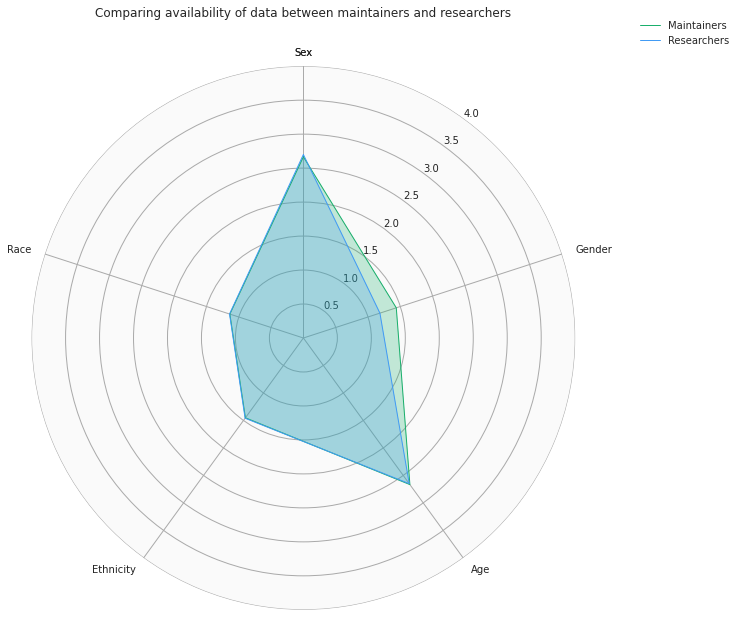

In [17]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, maintainers_avg, color='#1aaf6c', linewidth=1, label='Maintainers')
ax.fill(angles, maintainers_avg, color='#1aaf6c', alpha=0.25)
ax.plot(angles, researchers_avg, color='#429bf4', linewidth=1, label='Researchers')
ax.fill(angles, researchers_avg, color='#429bf4', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing availability of data between maintainers and researchers', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


#### Plotting them on two separated plots

Text(0.5, 1.08, 'Data availability for maintainers')

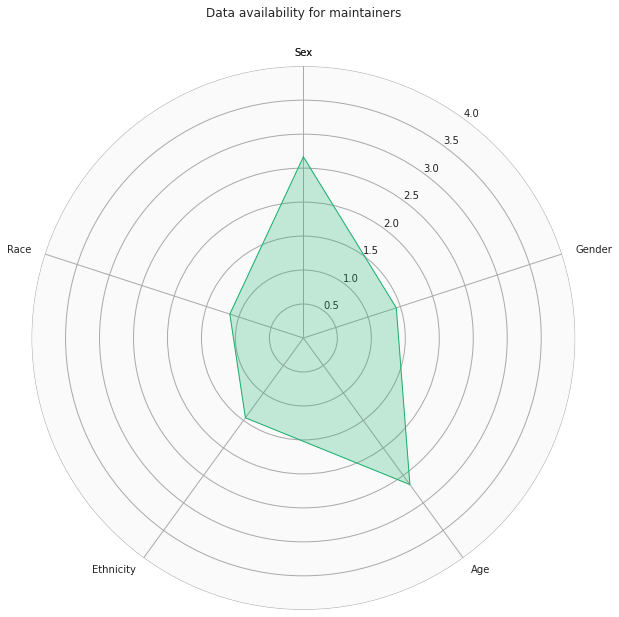

In [18]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, maintainers_avg, color='#1aaf6c', linewidth=1, label='Maintainers')
ax.fill(angles, maintainers_avg, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Data availability for maintainers', y=1.08)

Text(0.5, 1.08, 'Data availability for researchers')

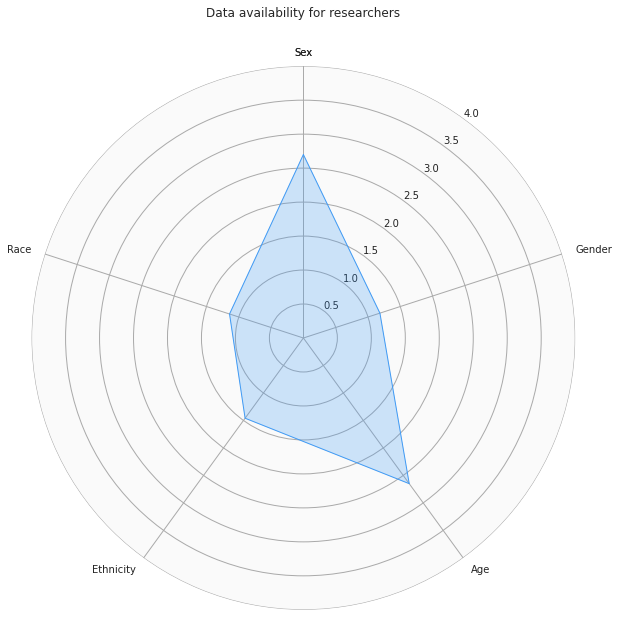

In [19]:
# Source: stackoverflow but cannot find it back

# Each attribute we'll plot in the radar chart.
categories = ['Sex', 'Gender', 'Age', 'Ethnicity', 'Race']

# Number of variables we're plotting.
num_vars = len(categories)
categories = [*categories, categories[0]]  # To fix a bug

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plots 
ax.plot(angles, researchers_avg, color='#429bf4', linewidth=1, label='Researchers')
ax.fill(angles, researchers_avg, color='#429bf4', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), categories)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 4.
ax.set_ylim(0, 4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-5) labels smaller.
#ax.tick_params(axis='y', labelsize=8)

# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')

# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')

# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Data availability for researchers', y=1.08)

### Normal likert scale plotting

In [20]:
scale = ['Never', 'Very Rarely', 'Occasionally', 'Very Frequently', 'Always']

df_maintainers_bar = df[["Maintainer - Sex", "Maintainer - Gender", "Maintainer - Age", "Maintainer - Ethnicity", "Maintainer - Race"]]
df_maintainers_bar.columns = df_maintainers_bar.columns.str.replace('Maintainer - ', '', regex=True)
df_researchers_bar = df[["Researcher - Sex", "Researcher - Gender", "Researcher - Age", "Researcher - Ethnicity", "Researcher - Race"]]
df_researchers_bar.columns = df_researchers_bar.columns.str.replace('Researcher - ', '', regex=True)

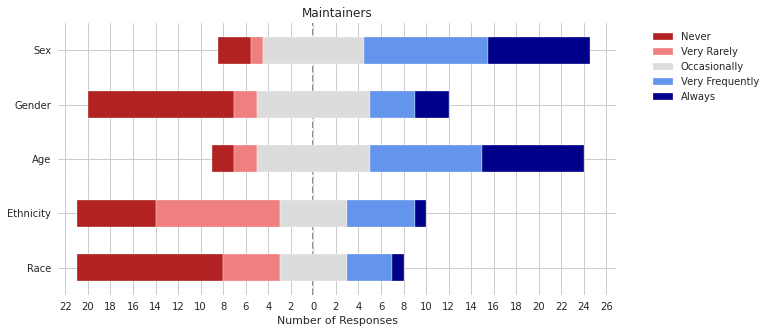

In [21]:
ax = plot_likert.plot_likert(df_maintainers_bar, scale, 
                        plot_percentage=False, figsize=(10, 5))
ax.set_title("Maintainers")
plt.show()

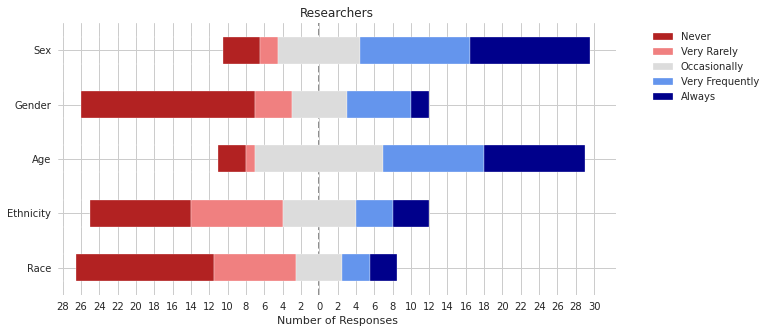

In [22]:
ax = plot_likert.plot_likert(df_researchers_bar, scale, 
                        plot_percentage=False, figsize=(10, 5))
ax.set_title("Researchers")
plt.show()

## Diversity information

This question need to be splitted to have all the possibilities. However, the vast majority claims the importance for both

In [23]:
df_div_info = pd.get_dummies(df['Diversity information'].str.split(',').str[0], dtype=bool)
df_div_info = df_div_info.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_div_info = df_div_info.sort_values(by=[True], ascending=False)
df_div_info

,False,True
Important for both,18,48
Not important,61,5
Important only for publications and Intellectual Property (IP),63,3
Depends on the field - there can potentially be cons as well as pros e.g. in genetics,65,1
Gender is not relevant to my work,65,1
Important only for fundering agencies,65,1
The reasons behind how important is for the different parties usually collides,65,1


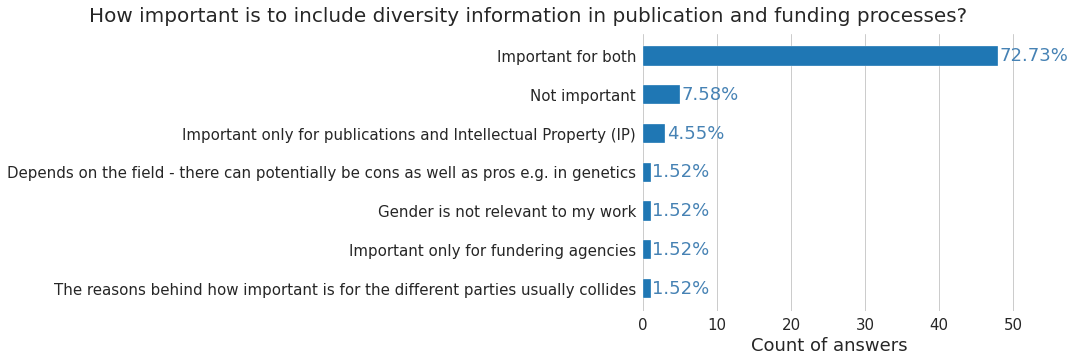

In [24]:
labels = df_div_info.index
count_true = df_div_info[True]
count_perc = df_div_info[True]/(df_div_info[True]+df_div_info[False])*100
width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc): # Loop through the count_per rather than count_true to get the perc value but count position
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('How important is to include diversity information in publication and funding processes?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

## Use of data

In [25]:
df_use_data = pd.get_dummies(df['Use of data'].str.split(',').str[0], dtype=bool)
df_use_data = df_use_data.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_use_data = df_use_data.sort_values(by=[True], ascending=False)
df_use_data

,False,True
Consumer,31,35
Developer,50,16
Curator,57,9
Creator,62,4
only involved in research support; not working in the field,65,1


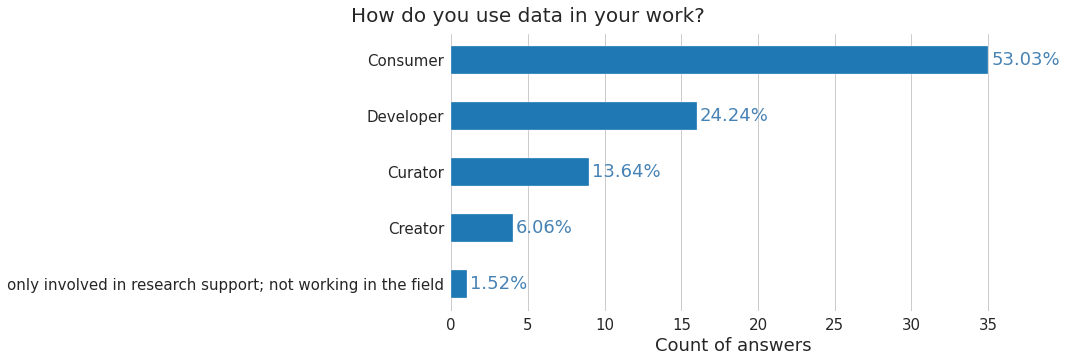

In [26]:
labels = df_use_data.index
count_true = df_use_data[True]
count_perc = df_use_data[True]/(df_use_data[True]+df_use_data[False])*100

width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('How do you use data in your work?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

## Capturing diversity

In [27]:
df_div_capt = pd.get_dummies(df['Capturing diversity'].str.split(',').str[0], dtype=bool)
df_div_capt = df_div_capt.apply(pd.value_counts).transpose().sort_values(by=True, ascending=False)
df_div_capt

,False,True
Self-assessment / Check list,40,26
International Standards,43,23
I don´t know,59,7
Codes of conduct,63,3
Legal Regulation,63,3
Editorial Policy Requirements,65,1
None,65,1
Requirements by funding bodies,65,1
Sex info is vital in biomedicine,65,1


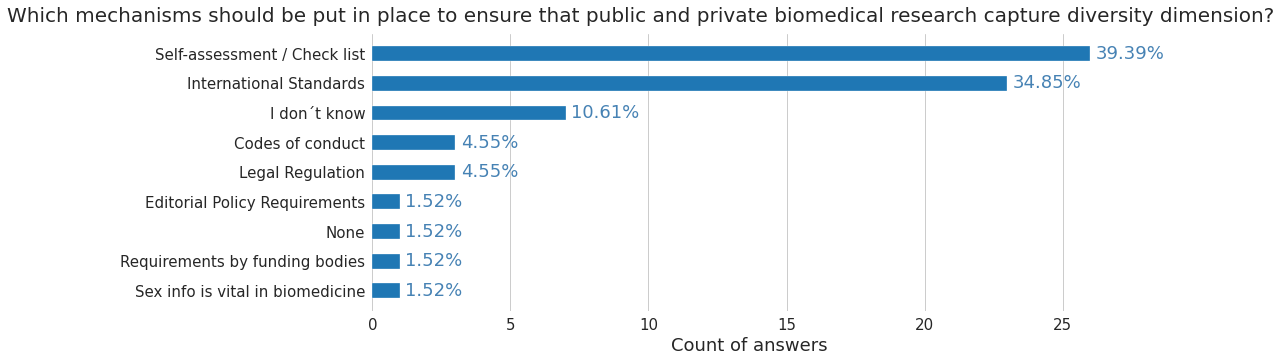

In [28]:
labels = df_div_capt.index
count_true = df_div_capt[True]
count_perc = df_div_capt[True]/(df_div_capt[True]+df_div_capt[False])*100

width = 0.5
fig, ax = plt.subplots(figsize=(15,5))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('Which mechanisms should be put in place to ensure that public and private biomedical research capture diversity dimension?', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

### Diversity Knowledge

In [29]:
df_div_know = df["Diversity knowledge"].value_counts(ascending=False).to_frame()#plot(kind='barh')
df_div_know

,Diversity knowledge
I don't know them,38
I know them and I use them,11
I know them but I don't need them,3
I know them but I don't apply them,2
I know them and I should use them,1
I know them but my current position does not concern their application,1
I am aware of general regulations such as GDPR but not biomedical specific guidelines as this is not my domain,1


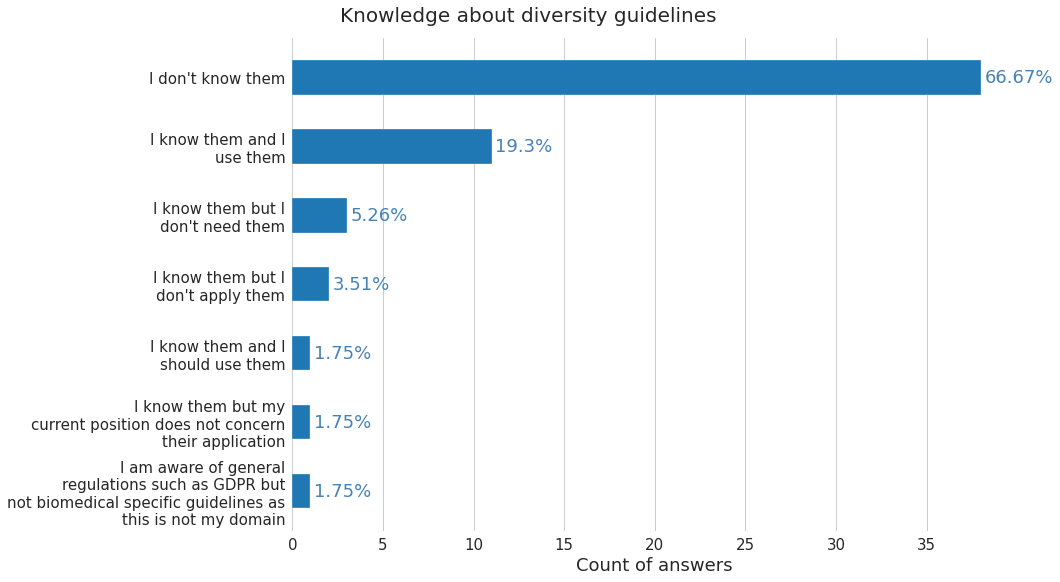

In [30]:
def insert_linebreak(string, max_words=5):
    string = string.split()
    return '\n'.join([' '.join(string[i:i+max_words]) for i in range(0,len(string),max_words)])

labels = df_div_know.index
labels = [insert_linebreak(i) for i in labels]
labels

count_true = df_div_know["Diversity knowledge"]
count_perc = count_true/sum(count_true)*100

width = 0.5
fig, ax = plt.subplots(figsize=(15,8))

ax.barh(labels, count_true, width, color='tab:blue')
for i, v in enumerate(count_perc):
    plt.text(count_true[i]+0.2, i, "{}%".format(str(round(v, 2))), color='steelblue', va="center")
    
ax.set_xlabel("Count of answers", fontsize='medium')

ax.yaxis.grid(False)   
ax.xaxis.grid(True)                                                 

plt.xticks(fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()

plt.suptitle('Knowledge about diversity guidelines', fontsize=20,  y=1.02)
plt.gca().invert_yaxis()
plt.show()

## Crossing data

### Training by Age, Pronouns and Work Experience

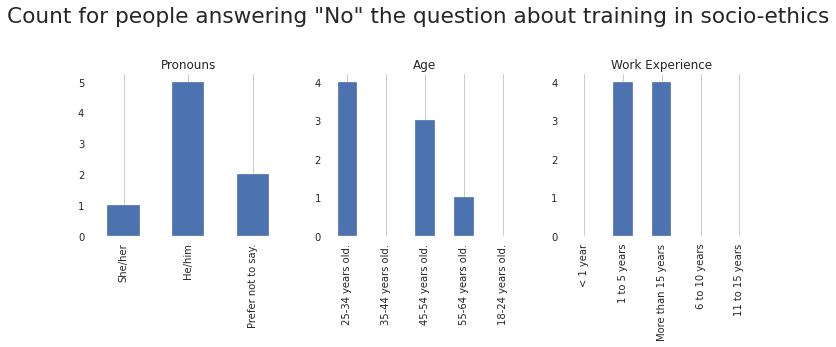

In [31]:
cat_var = ["Pronouns", "Age", "Work Experience"]
df_to_plot = df[df['Training in socio-ethics'] == 'No'][cat_var] # Only interested with people said "No"


fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=len(cat_var))
plt.suptitle('Count for people answering "No" the question about training in socio-ethics')
for i, cat in enumerate(df_to_plot[cat_var]):
    df_to_plot[cat].value_counts().reindex(df[cat].unique(), fill_value=0).plot(kind="bar", ax=ax[i]).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)    
    
plt.tight_layout()

### Diversity relevance by Age, Pronouns and Work Experience

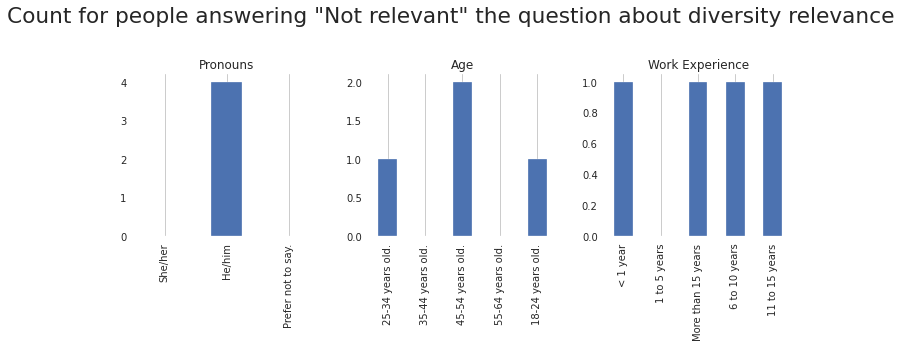

In [32]:
cat_var = ["Pronouns", "Age", "Work Experience"]


df_to_plot = df[df['Diversity relevance'] == 'Not relevant'][cat_var] # # Only interested with people said "Not relevant"


fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=len(cat_var))
plt.suptitle('Count for people answering "Not relevant" the question about diversity relevance')
for i, cat in enumerate(df_to_plot[cat_var]):
    df_to_plot[cat].value_counts().reindex(df[cat].unique(), fill_value=0).plot(kind="bar", ax=ax[i]).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)    
    
plt.tight_layout()

### Diversity capture by Age, Pronouns and Work Experience

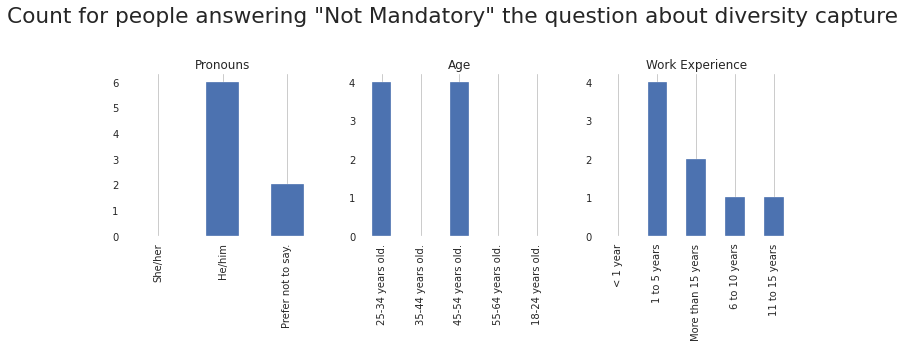

In [33]:
cat_var = ["Pronouns", "Age", "Work Experience"]
df_to_plot = df[df["Diversity capture"] == 'Not Mandatory'][cat_var] # Only interested in the ones that said 'Not Mandatory'

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=len(cat_var))
plt.suptitle('Count for people answering "Not Mandatory" the question about diversity capture')
for i, cat in enumerate(df_to_plot[cat_var]):
    df_to_plot[cat].value_counts().reindex(df[cat].unique(), fill_value=0).plot(kind="bar", ax=ax[i]).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)    
    
plt.tight_layout()

### Intersectional analysis by Age, Pronouns and Work Experience

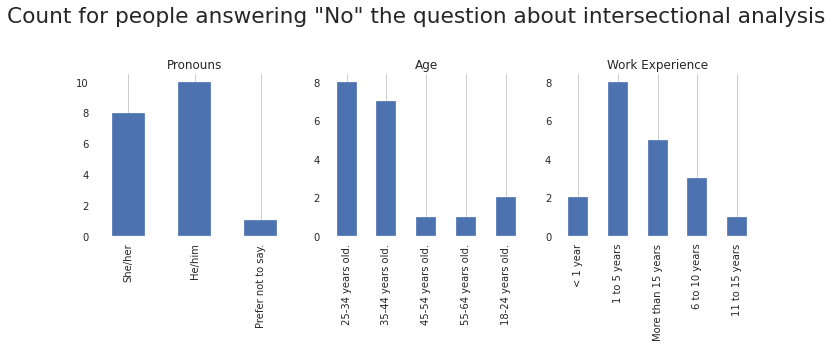

In [34]:
cat_var = ["Pronouns", "Age", "Work Experience"]
df_to_plot = df[df["Intersectional analysis"] == 'No'][cat_var] # Only interested in the ones that said 'No'

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=len(cat_var))
plt.suptitle('Count for people answering "No" the question about intersectional analysis')
for i, cat in enumerate(df_to_plot[cat_var]):
    df_to_plot[cat].value_counts().reindex(df[cat].unique(), fill_value=0).plot(kind="bar", ax=ax[i]).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)    
    
plt.tight_layout()

### Researcher that never included Sex and Gender by Age, Pronouns and Work Experience

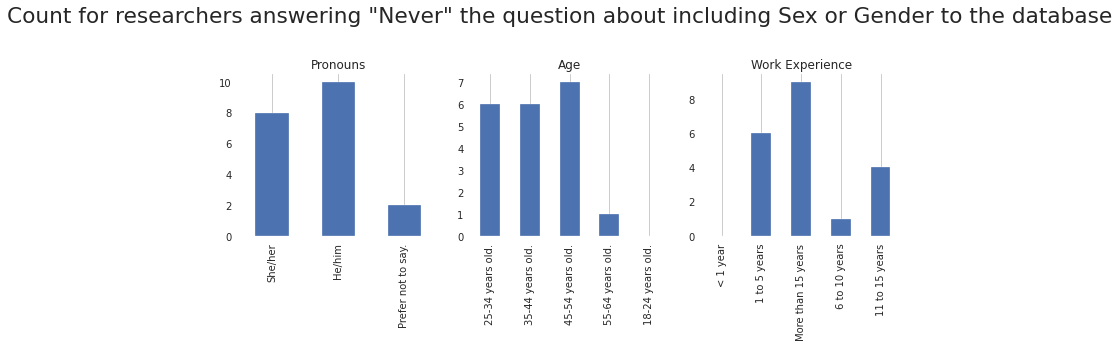

In [35]:
cat_var = ["Pronouns", "Age", "Work Experience"]



df_to_plot = df[(df["Researcher - Sex"] == 'Never') | (df["Researcher - Gender"] == 'Never')][cat_var] # Only interested in the ones that said 'No'

fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=len(cat_var))
plt.suptitle('Count for researchers answering "Never" the question about including Sex or Gender to the database')
for i, cat in enumerate(df_to_plot[cat_var]):
    df_to_plot[cat].value_counts().reindex(df[cat].unique(), fill_value=0).plot(kind="bar", ax=ax[i]).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)    
    
plt.tight_layout()

### The demographic of people that answer negatively to all the questions

In [36]:
mask = (df["Researcher - Sex"] == 'Never') | (df["Researcher - Gender"] == 'Never') | (df["Intersectional analysis"] == 'No') | (df["Diversity capture"] == 'Not Mandatory') | (df['Diversity relevance'] == 'Not relevant') | (df['Training in socio-ethics'] == 'No')
df['Negative'] = mask

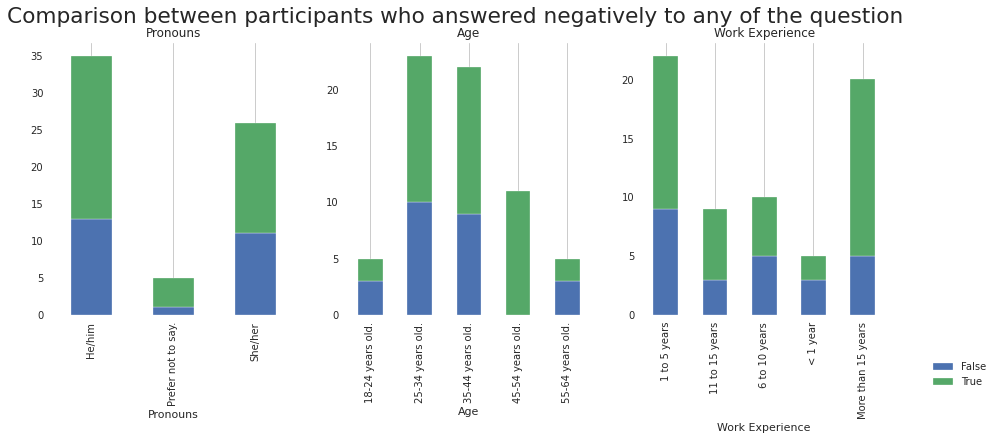

In [37]:
cat_var = ["Pronouns", "Age", "Work Experience"]
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)
plt.suptitle('Comparison between participants who answered negatively to any of the question')
for i, cat in enumerate(df_to_plot[cat_var]):
    df.groupby([cat, 'Negative']).size().unstack(fill_value=0).plot(kind="bar", ax=ax[i], stacked=True).set_title(cat)
for ax_ in ax:
    ax_.yaxis.grid(False)   
    ax_.xaxis.grid(True)
    ax_.get_legend().remove()
handles, labels = ax_.get_legend_handles_labels()
plt.legend( handles, labels, loc = 'lower right', bbox_to_anchor = (0,-0.1,1,1),
            bbox_transform = plt.gcf().transFigure )
#plt.tight_layout()
plt.show()